### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing and loading datasets

In [2]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')

In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Shape of the Data Sets

In [5]:
application_data.shape

(307511, 122)

In [6]:
previous_application.shape

(1670214, 37)

### Setting the column width and rows to maximum to view all of them for future analysis

In [7]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

### Validating correct data types for all columns

In [8]:
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### Data Cleaning

#### Finding Null Values 

In [9]:
#calculate the null value percentage to drop high percentage null value columns

null_percentage = round((application_data.isnull().sum() / len(application_data)) * 100,2)
null_percentage = null_percentage[null_percentage>0]
null_percentage

AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MO

In [10]:
null_percentage_high = null_percentage[null_percentage >= 40]
null_percentage_high.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

#### Drop high null precentage columns

In [11]:
application_data.drop(columns = null_percentage_high.index.to_list(), inplace = True)

In [12]:
application_data.shape

(307511, 73)

#### Check other columns with null values to fix them

In [13]:
application_data.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_21                   0
FLAG_DOCUMENT_20                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
F

In [14]:
# Occupation type has many missing values but imputing it with mode will give a biased analysis if we need to analyse any attributes based on occupation
# So imputing the null values with a constant value UNKNOWN

application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [15]:
#Imputing nullvalues with mode

application_data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [16]:
# Creating a list with all continuous columns with null values 
#Can plot boxplots for all at a time using loop and replacing values accordingly with mean/median

continuous_columns_with_nullvalues = ['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR', 'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE','AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

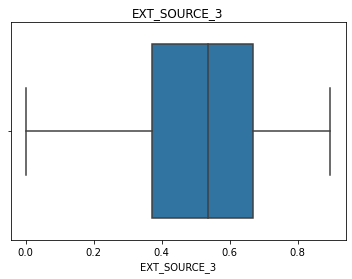

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


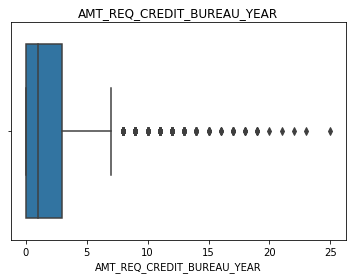

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


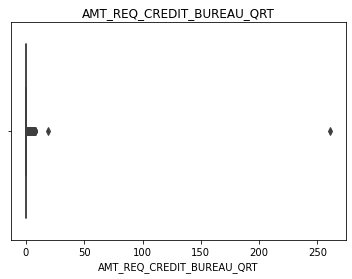

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


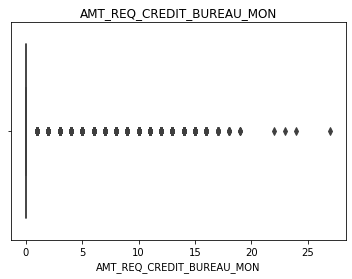

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


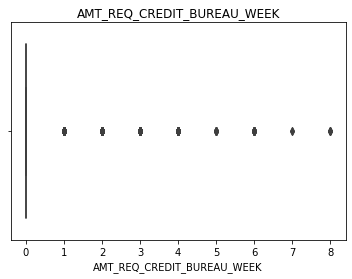

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


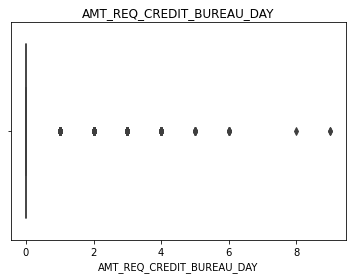

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


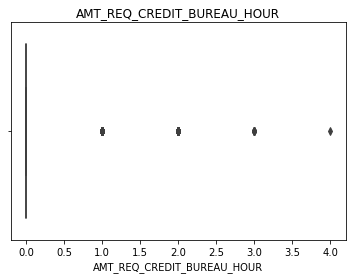

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


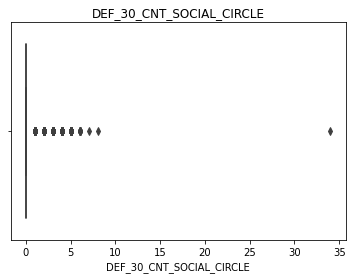

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


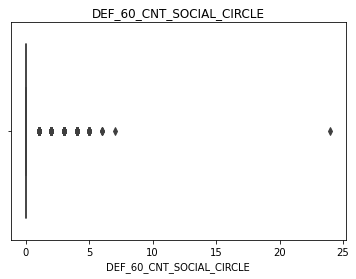

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


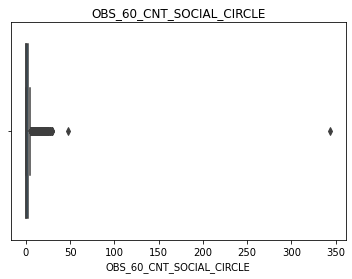

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


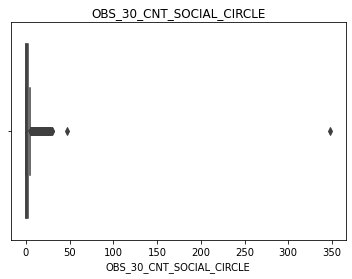

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


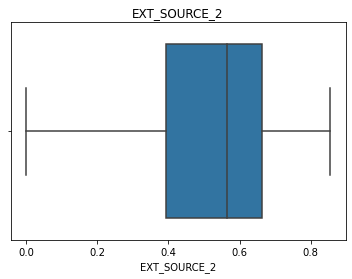

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


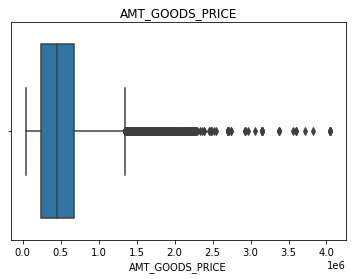

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


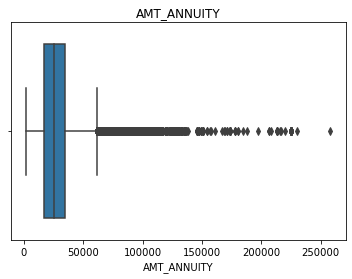

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


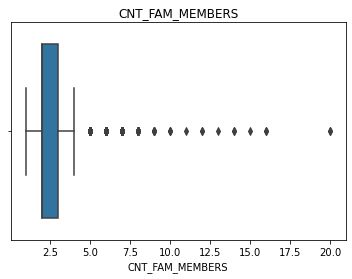

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


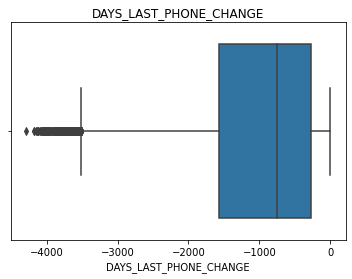

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


In [17]:
for i in continuous_columns_with_nullvalues:
    sns.boxplot(application_data[i]).set(title = i)
    plt.show()
    print(application_data[i].describe())

In [18]:
# EXT_SOURCE_3 has no extreme values so can replace by mean

application_data['EXT_SOURCE_3'].fillna(0.510853, inplace = True)

#AMT_REQ_CREDIT_BUREAU_YEAR has outliers so replacing with median

application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(1.000000, inplace = True)

#AMT_REQ_CREDIT_BUREAU_QRT has outliers so replacing with median

application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.000000, inplace = True)

#AMT_REQ_CREDIT_BUREAU_MON has outliers so replacing with median

application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.000000, inplace = True)

#AMT_REQ_CREDIT_BUREAU_WEEK has outliers so replacing with median

application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.000000, inplace = True)

#AMT_REQ_CREDIT_BUREAU_DAY has outliers so replacing with median

application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.000000, inplace = True)

#AMT_REQ_CREDIT_BUREAU_HOUR has outliers so replacing with median
     
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.000000, inplace = True)

#OBS_30_CNT_SOCIAL_CIRCLE has outliers so replacing with median

application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.000000, inplace = True)

#DEF_30_CNT_SOCIAL_CIRCLE has outliers so replacing with median

application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.000000, inplace = True)

#OBS_60_CNT_SOCIAL_CIRCLE has outliers so replacing with median

application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.000000, inplace = True)

#DEF_60_CNT_SOCIAL_CIRCLE has outliers so replacing with median

application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.000000, inplace = True)

#EXT_SOURCE_2 has no extreme values so replacing with mean

application_data['EXT_SOURCE_2'].fillna(5.143927e-01, inplace = True)

#AMT_GOODS_PRICE has outliers so replacing with median

application_data['AMT_GOODS_PRICE'].fillna(4.500000e+05, inplace = True)

#AMT_ANNUITY has outliers so replacing with median

application_data['AMT_ANNUITY'].fillna(24903.000000, inplace = True)

#CNT_FAM_MEMBERS has outliers so replacing with median

application_data['CNT_FAM_MEMBERS'].fillna(2.000000, inplace = True)

#DAYS_LAST_PHONE_CHANGE has outliers so replacing with median

application_data['DAYS_LAST_PHONE_CHANGE'].fillna(-757.000000, inplace = True)

In [19]:
#Checking if there are any XNA values in any of the colums

application_data.isin(['XNA']).any().sort_values(ascending = False)

ORGANIZATION_TYPE               True
CODE_GENDER                     True
SK_ID_CURR                     False
FLAG_DOCUMENT_2                False
FLAG_DOCUMENT_8                False
FLAG_DOCUMENT_7                False
FLAG_DOCUMENT_6                False
FLAG_DOCUMENT_5                False
FLAG_DOCUMENT_4                False
FLAG_DOCUMENT_3                False
DEF_60_CNT_SOCIAL_CIRCLE       False
DAYS_LAST_PHONE_CHANGE         False
FLAG_DOCUMENT_10               False
OBS_60_CNT_SOCIAL_CIRCLE       False
DEF_30_CNT_SOCIAL_CIRCLE       False
OBS_30_CNT_SOCIAL_CIRCLE       False
EXT_SOURCE_3                   False
EXT_SOURCE_2                   False
FLAG_DOCUMENT_9                False
FLAG_DOCUMENT_11               False
REG_CITY_NOT_WORK_CITY         False
FLAG_DOCUMENT_20               False
AMT_REQ_CREDIT_BUREAU_QRT      False
AMT_REQ_CREDIT_BUREAU_MON      False
AMT_REQ_CREDIT_BUREAU_WEEK     False
AMT_REQ_CREDIT_BUREAU_DAY      False
AMT_REQ_CREDIT_BUREAU_HOUR     False
F

##### Columns CODE_GENDER and ORGANIZATION_TYPE have XNA values

In [20]:
# Imputing the value'XNA' for the column 'CODE_GENDER'

application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [21]:
# F has more no of values so can replace XNA with F

application_data['CODE_GENDER'] = application_data['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

In [22]:
application_data['ORGANIZATION_TYPE'].value_counts()
print(application_data['ORGANIZATION_TYPE'].value_counts().sum())

307511


In [23]:
# No. of XNA value counts are 55374
# Total sum = 307511
# i.e., 18% of values are XNA, So better to drop these rows

application_data.drop(application_data[application_data['ORGANIZATION_TYPE'] == 'XNA'].index, inplace=True)

In [24]:
#Now we don't have any null values and XNA values
#But while fixing the null values I have observed DAYS_LAST_PHONE_CHANGE column with negative values
#So we need to replace such values with absolute values

application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,2.521370e+05,252137.000000,252137.000000,252137.000000,...,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,5.493047e+05,0.020894,-14769.133174,-2384.169325,...,0.009836,0.000710,0.000615,0.000409,0.005703,0.006040,0.029496,0.244137,0.224925,1.741299
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,3.730924e+05,0.013874,3662.573769,2338.360162,...,0.098687,0.026635,0.024786,0.020207,0.079206,0.103325,0.189074,0.887624,0.771489,1.724162
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,2.475000e+05,0.010006,-17563.000000,-3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05,0.018850,-14573.000000,-1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,6.930000e+05,0.028663,-11775.000000,-767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


In [25]:
#By using describe function I have noticed DAYS columns have negative values
#So replace all days columns with absolute values

days_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
for i in days_columns:
    application_data[i]=abs(application_data[i])

application_data[days_columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,14769.133174,2384.169325,4635.430849,2800.639724,971.037745
std,3662.573769,2338.360162,3252.169156,1515.360629,827.303772
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,11775.000000,767.000000,1845.000000,1487.000000,288.000000
50%,14573.000000,1648.000000,4265.000000,2886.000000,763.000000
75%,17563.000000,3175.000000,6952.000000,4177.000000,1578.000000
max,25200.000000,17912.000000,22928.000000,7197.000000,4292.000000


### Segmentation

In [26]:
#Now we are done with data cleaning and good to go for analysis
#Performing segmentation to enhance analysis
#Adding columns to the respective lists categorical wise

num_columns = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
cat_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
id_columns = ['SK_ID_CURR']

### Data Analysis

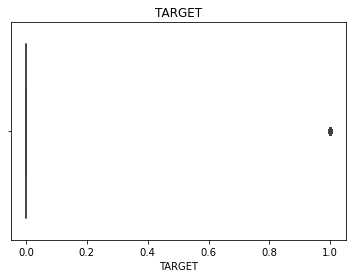

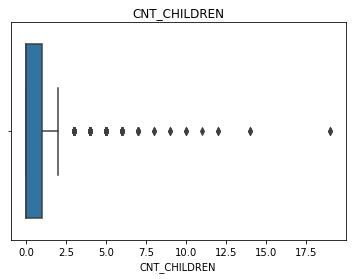

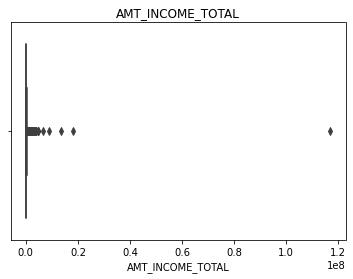

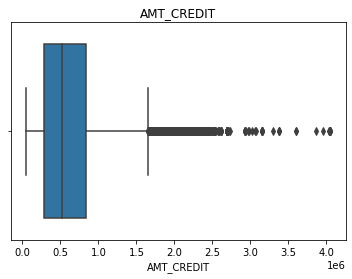

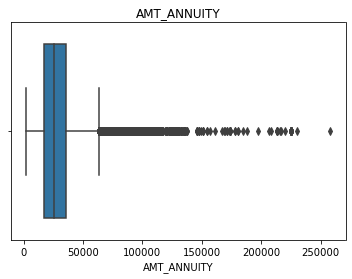

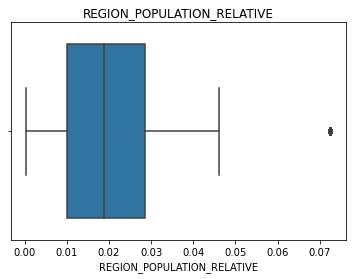

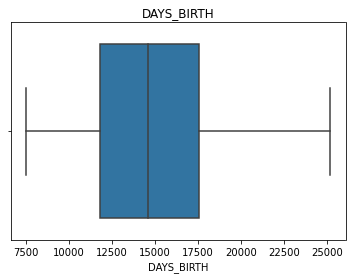

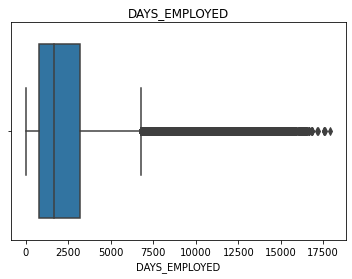

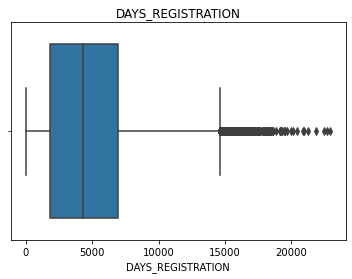

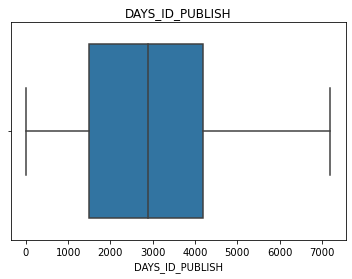

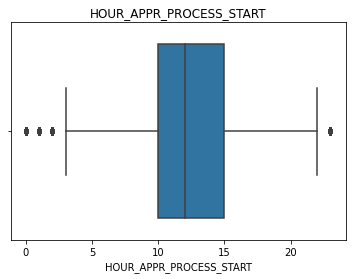

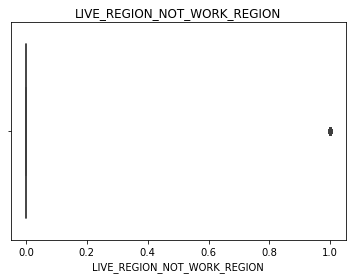

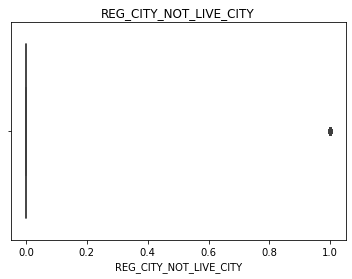

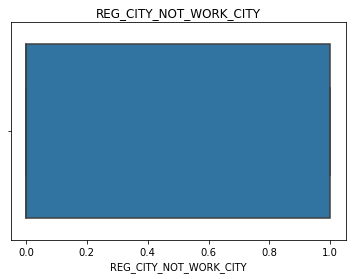

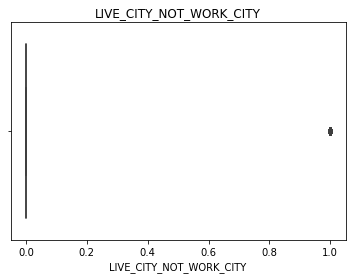

In [27]:
#plotting boxplots for num_columns to read their distribution 


for i in num_columns:
    sns.boxplot(application_data[i]).set(title=i)
    plt.show()

#### Observations from above boxplots

1. Observing the Target boxplot, it's evident that the count of defaulters is lower in comparison to non-defaulters
2. A significant proportion of clients share identical contact and work addresses
3. The percentage of clients with differing contact and permanent addresses is relatively minimal

#### Binning numerical columns with amount in them 

In [28]:
bins = [0,100000,200000,300000,400000,500000,600000, 700000, 800000, 900000, 10000000, 10000000000]
labels = ['less than 100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000 and above']

bins_annuity = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,3000000]
labels_annuity = ['less than 25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-250000','250000 and above']

In [29]:
application_data['Amt_Income_Range'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins = bins, labels = labels)
application_data['Amt_Credit_Range'] = pd.cut(application_data['AMT_CREDIT'], bins = bins, labels = labels)
application_data['Amt_Goods_Price_Range'] = pd.cut(application_data['AMT_GOODS_PRICE'], bins = bins, labels = labels)
application_data['Amt_Annuity'] = pd.cut(application_data['AMT_ANNUITY'], bins = bins_annuity, labels = labels_annuity)

#### Creating separate data frames for targets 0 & 1

In [30]:
repayers = application_data[application_data['TARGET'] == 0]
defaulters = application_data[application_data['TARGET'] == 1]

#### Data Imbalance

In [31]:
#calculating data imbalance 

round(len(repayers)/len(defaulters),2)

10.55

##### The Imbalance ratio is 10.55

### Univariate Categorical Analysis

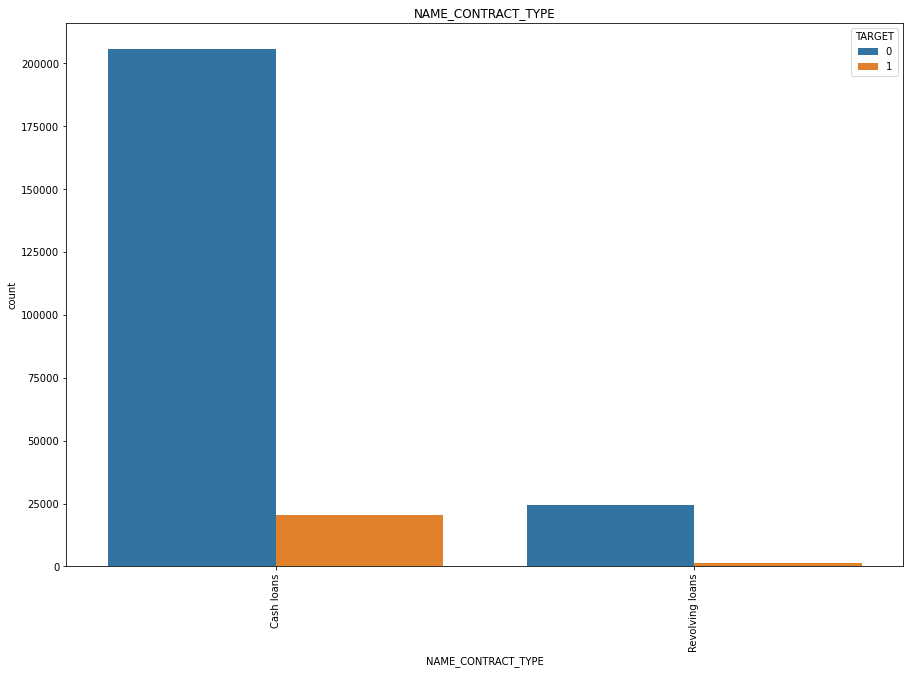

                    TARGET
NAME_CONTRACT_TYPE        
Cash loans            9.00
Revolving loans       5.65


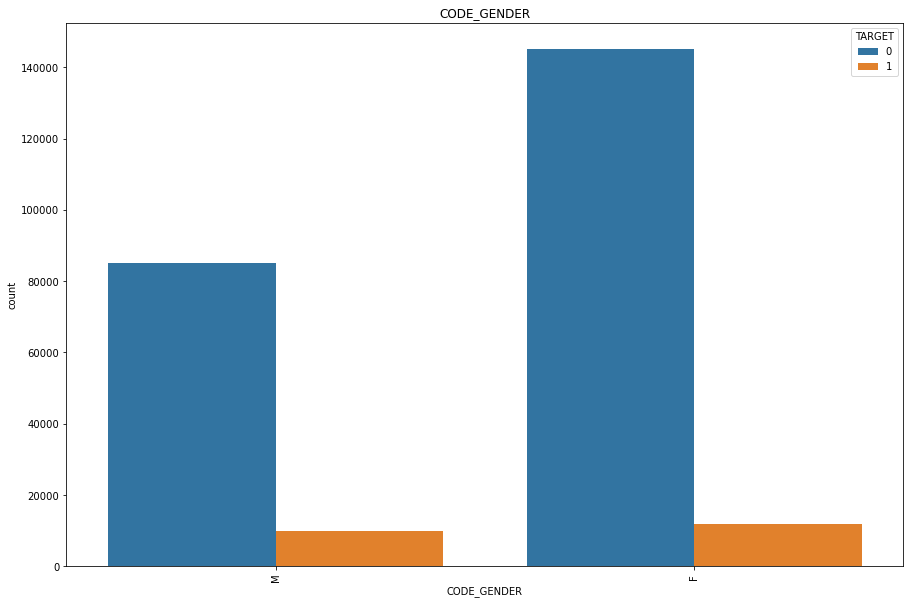

             TARGET
CODE_GENDER        
F              7.58
M             10.44


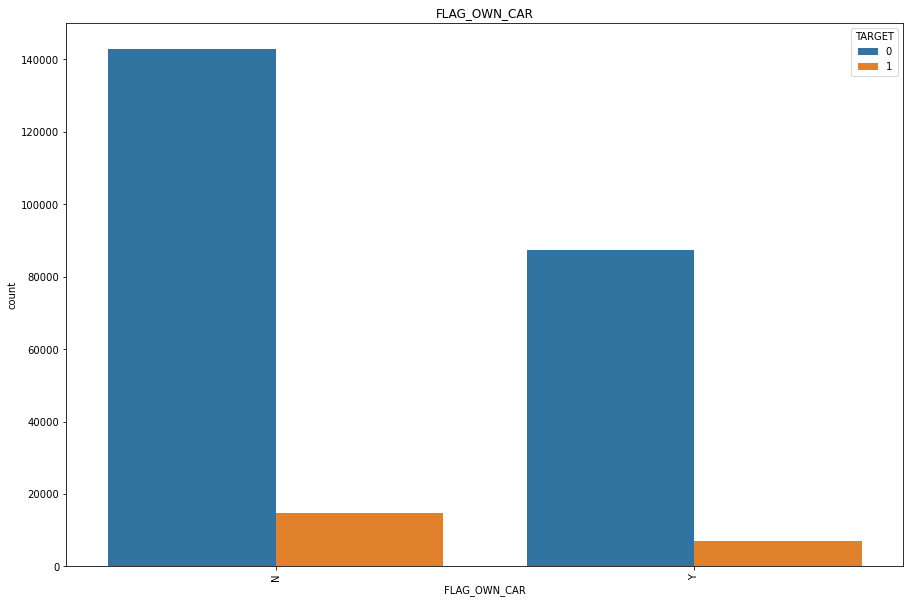

              TARGET
FLAG_OWN_CAR        
N               9.35
Y               7.50


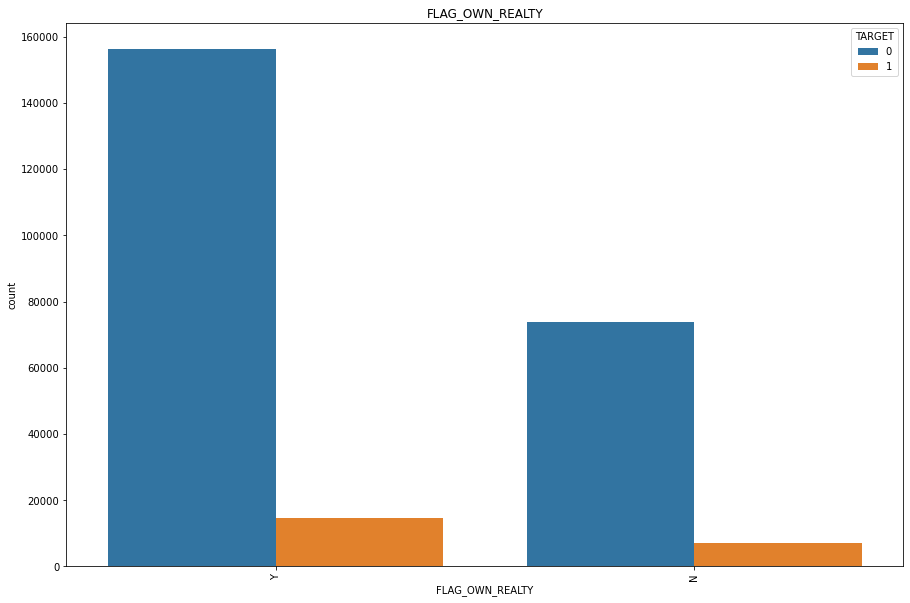

                 TARGET
FLAG_OWN_REALTY        
N                  8.77
Y                  8.61


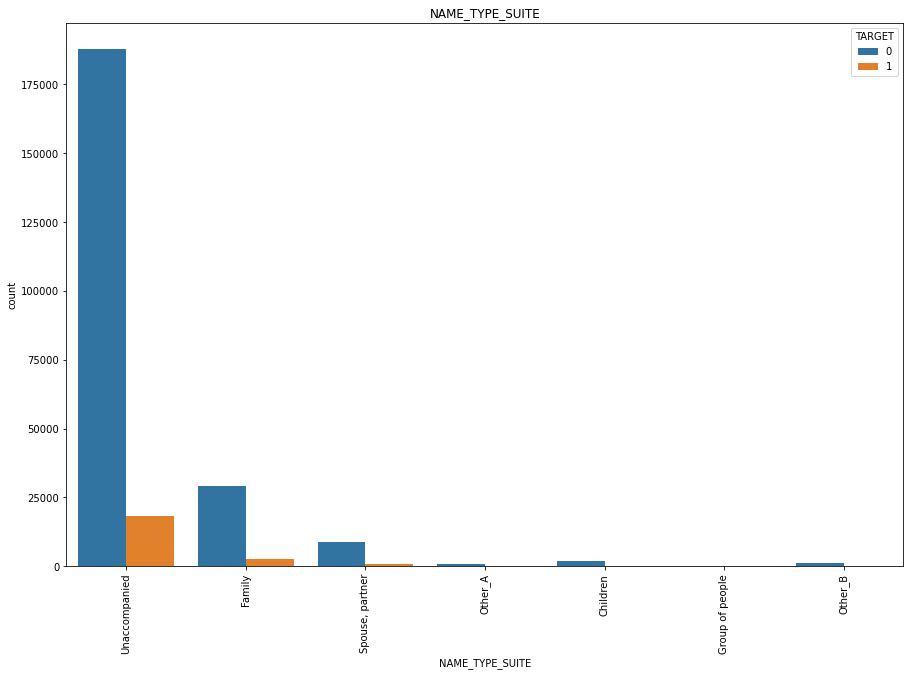

                 TARGET
NAME_TYPE_SUITE        
Children           7.51
Family             7.96
Group of people   10.19
Other_A            9.06
Other_B           10.52
Spouse, partner    8.34
Unaccompanied      8.78


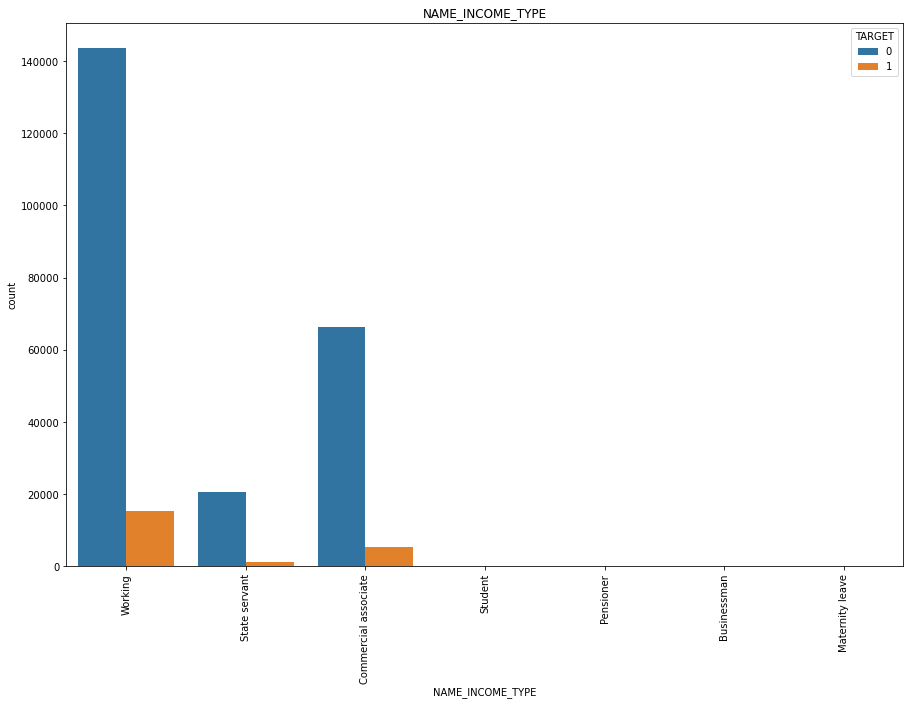

                      TARGET
NAME_INCOME_TYPE            
Businessman             0.00
Commercial associate    7.48
Maternity leave        40.00
Pensioner               0.00
State servant           5.75
Student                 0.00
Working                 9.59


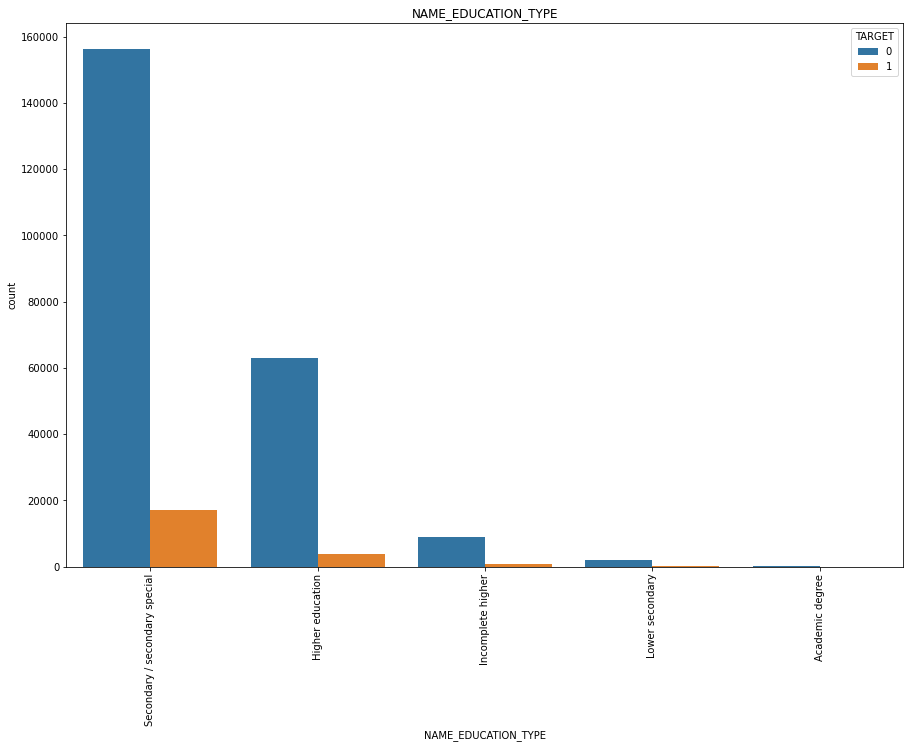

                               TARGET
NAME_EDUCATION_TYPE                  
Academic degree                  2.17
Higher education                 5.50
Incomplete higher                8.69
Lower secondary                 13.77
Secondary / secondary special    9.81


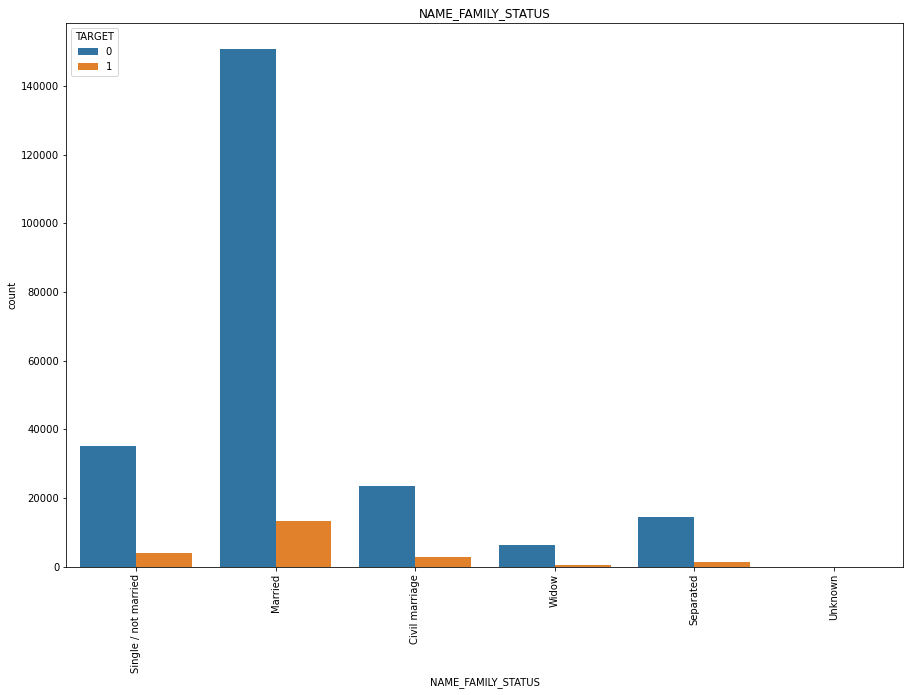

                      TARGET
NAME_FAMILY_STATUS          
Civil marriage         10.44
Married                 8.05
Separated               8.70
Single / not married   10.48
Unknown                 0.00
Widow                   5.98


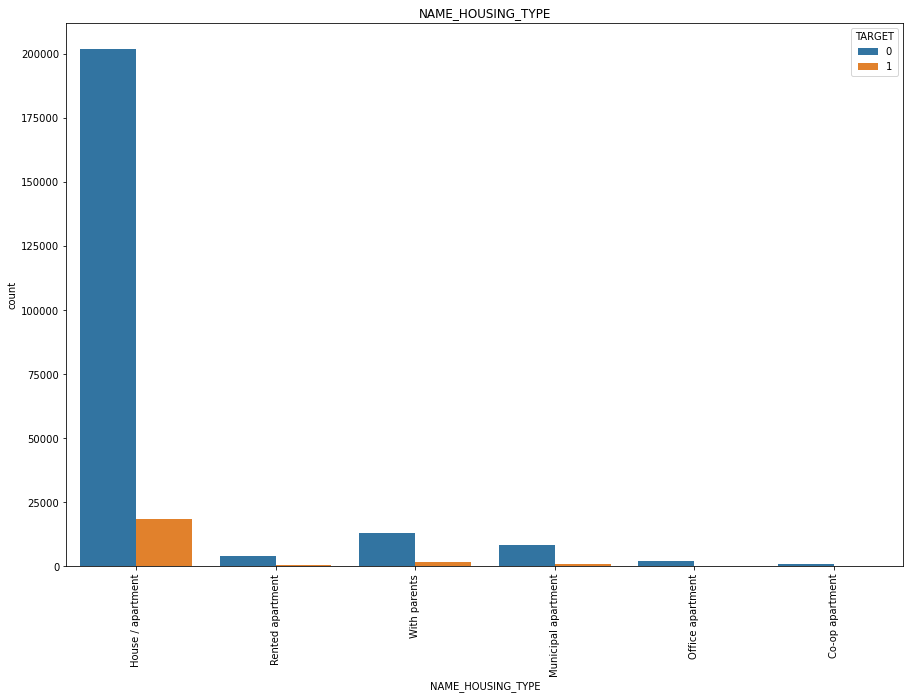

                     TARGET
NAME_HOUSING_TYPE          
Co-op apartment        8.35
House / apartment      8.38
Municipal apartment    8.99
Office apartment       6.65
Rented apartment      12.55
With parents          11.80


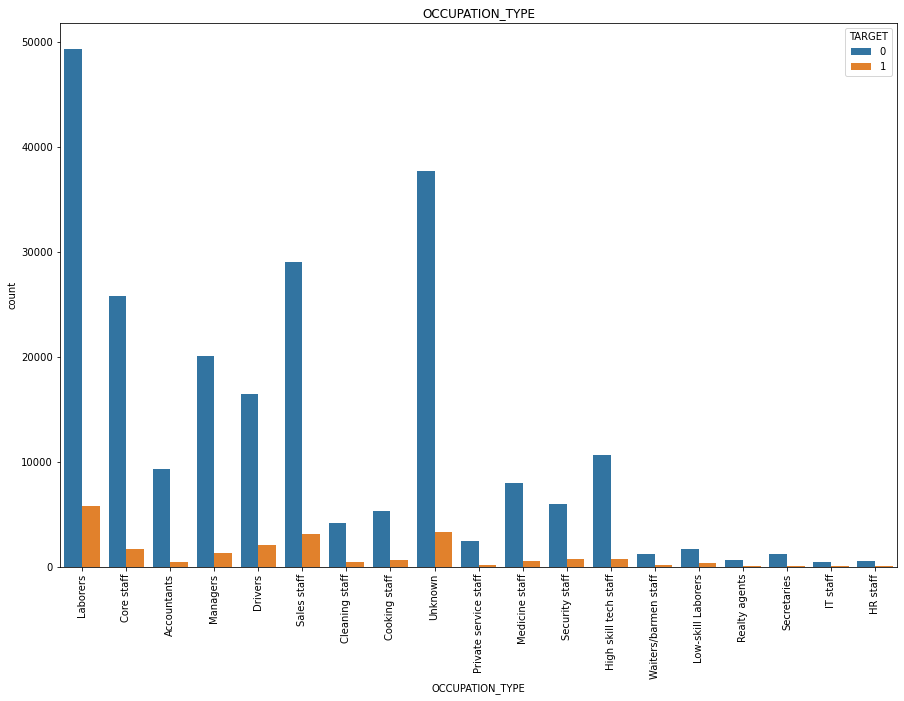

                       TARGET
OCCUPATION_TYPE              
Accountants              4.83
Cleaning staff           9.61
Cooking staff           10.44
Core staff               6.30
Drivers                 11.33
HR staff                 6.39
High skill tech staff    6.16
IT staff                 6.46
Laborers                10.58
Low-skill Laborers      17.15
Managers                 6.21
Medicine staff           6.70
Private service staff    6.60
Realty agents            7.86
Sales staff              9.63
Secretaries              7.05
Security staff          10.74
Unknown                  8.02
Waiters/barmen staff    11.28


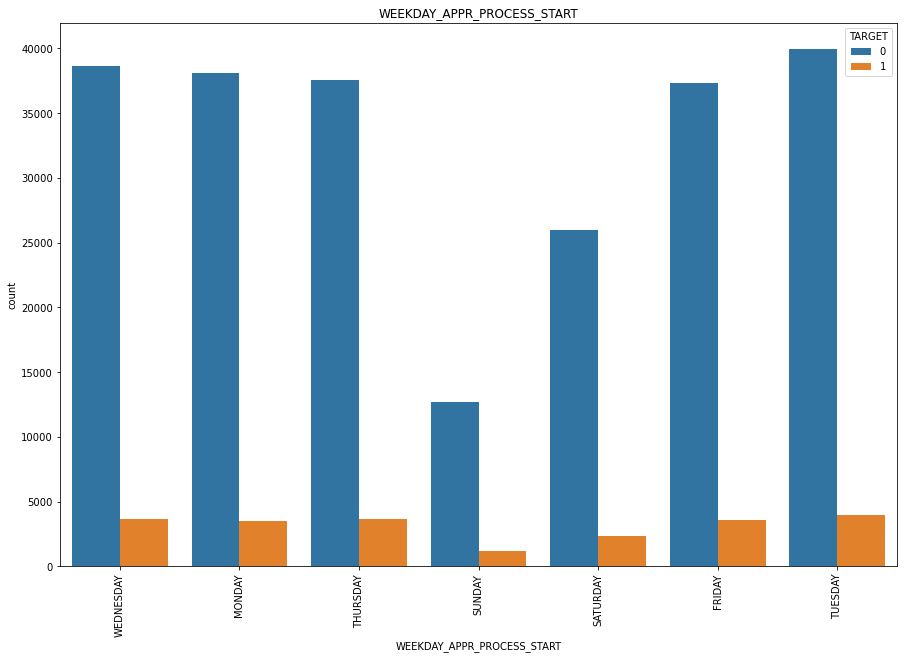

                            TARGET
WEEKDAY_APPR_PROCESS_START        
FRIDAY                        8.78
MONDAY                        8.32
SATURDAY                      8.37
SUNDAY                        8.35
THURSDAY                      8.79
TUESDAY                       9.00
WEDNESDAY                     8.68


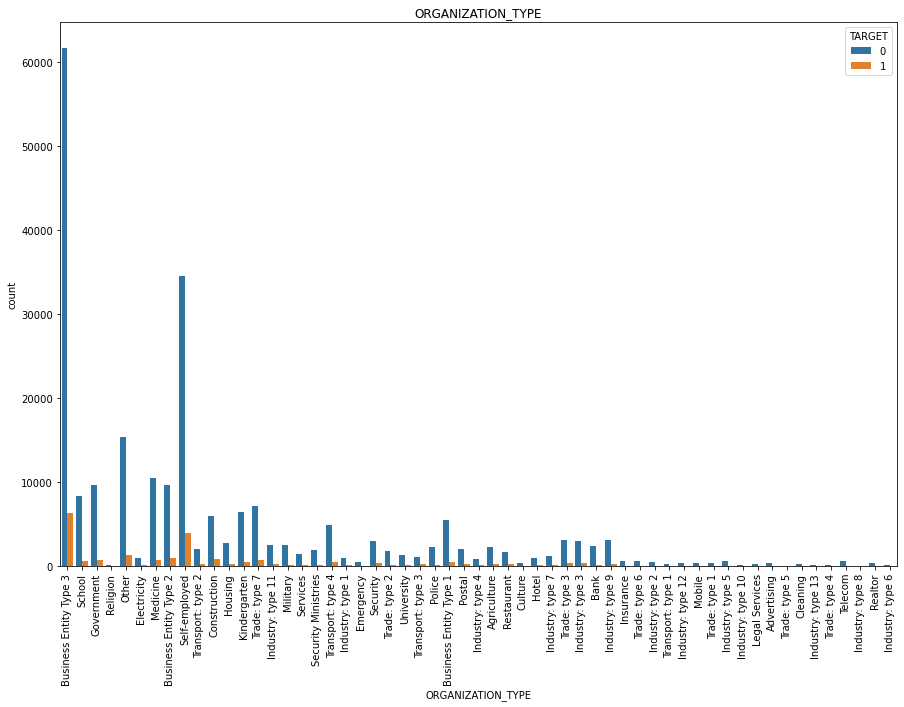

                        TARGET
ORGANIZATION_TYPE             
Advertising               8.16
Agriculture              10.47
Bank                      5.19
Business Entity Type 1    8.14
Business Entity Type 2    8.53
Business Entity Type 3    9.30
Cleaning                 11.15
Construction             11.68
Culture                   5.54
Electricity               6.63
Emergency                 7.14
Government                6.98
Hotel                     6.42
Housing                   7.94
Industry: type 1         11.07
Industry: type 10         6.42
Industry: type 11         8.65
Industry: type 12         3.79
Industry: type 13        13.43
Industry: type 2          7.21
Industry: type 3         10.62
Industry: type 4         10.15
Industry: type 5          6.84
Industry: type 6          7.14
Industry: type 7          8.03
Industry: type 8         12.50
Industry: type 9          6.68
Insurance                 5.70
Kindergarten              7.03
Legal Services            7.87
Medicine

In [32]:
for i in cat_columns:
    plt.figure(figsize = (15,10))
    sns.countplot(data = application_data, x = i, hue = 'TARGET').set(title = i)
    plt.xticks(rotation=90)
    plt.show()
    print(round(application_data[[i,'TARGET']].groupby([i]).mean()*100,2))

### Observations:

1.Most of the customers have taken cash loan and customers who have taken cash loans are more likely to default as the pecentage of cash loans defaulters is 9 and where as revolving loans defaulters rate is 5.65%. 

2.The count of females who have taken loan is more and default rate is approximately 7.5% which less compared to Male(9%).

3.People whow owns a car have taken less loans than people who don't own a car and less likely to default. Because who own a car might be mostly above middle class and financially good enough to repay the loan. 

4.The customers who are accompanied have take more loans ad default rate is approx 8.5%. Clients with name type suite Other_B are more likely to default. Clients with childer are less likely to default and safe.

5.Working professionals are given more number of loans and defaulter rate is 9.5% which seems safe compare to number of loans given. People on Maternity leave are most of the defaulters.

6.People who are low educated are more likely to default whereas people with higher education and academic degree are less likely to default.

7.Most of the loans are given to married people and default rate is approx 8%. Single and Civil marriage folks have a default rate of 10.5% approximately. So comparingly Married people are less likely to default.

8.People with own house/apartment are given most of the loans and are less likely to default compared to people in rented apartments.

9.Low skill labourers/Drivers/Waiters/Barmen are more likely to default and accountants are very less in defaulting because they have proper knowledge of consequences of defaulting. Core/HR/IT/Manager/Medicine staff have low defaulters rate.

10.Business entity type-3 are given most of the loans and default rate is ~9%. Transport: type 3 are more likely to default because even though loans given to them are low most of them have been defaulters.

11.From above all plots ignoring the week day approval start day because it date is no where related to anlalyze a person as defaulter or no.

### Conclusion from Univariate Categorical Analysis

From Univariate Categorical analysis we can conclude it is safe to approve loans to homeowners and highly educated individuals, particularly skilled professionals such as Core/HR/IT/Manager/Medicine staff, and those married.

Also good to ignore the low-skilled laborers, lower education levels, and those on extended leaves like maternity.

### Univariate Numerical Data Analysis

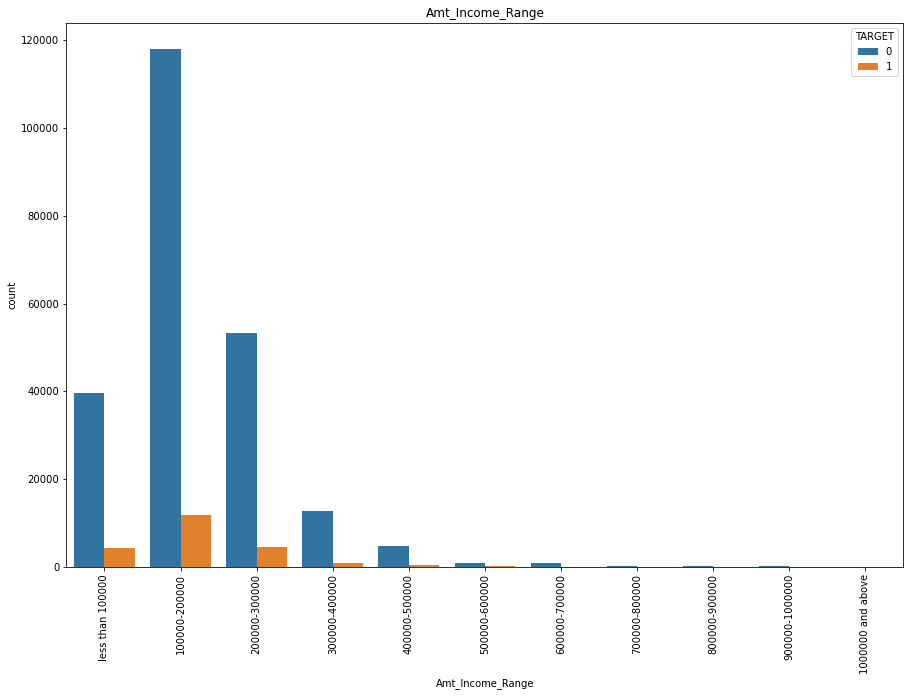

                   TARGET
Amt_Income_Range         
less than 100000     9.57
100000-200000        9.14
200000-300000        7.84
300000-400000        6.18
400000-500000        5.96
500000-600000        6.63
600000-700000        5.02
700000-800000        2.00
800000-900000        5.96
900000-1000000       4.92
1000000 and above   33.33


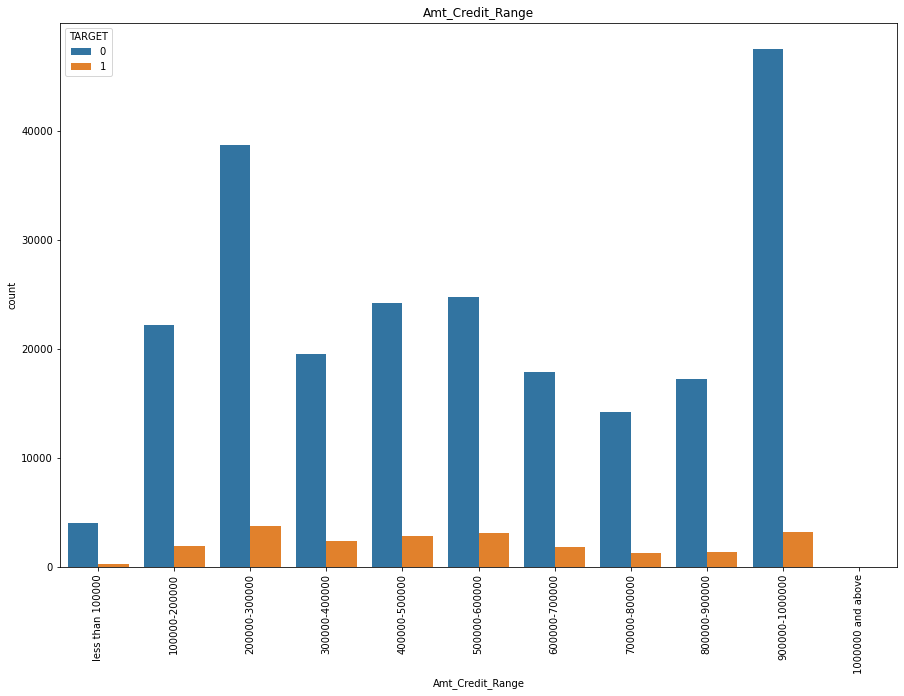

                   TARGET
Amt_Credit_Range         
less than 100000     6.35
100000-200000        7.91
200000-300000        8.84
300000-400000       10.66
400000-500000       10.52
500000-600000       11.24
600000-700000        9.37
700000-800000        8.07
800000-900000        7.20
900000-1000000       6.23
1000000 and above     NaN


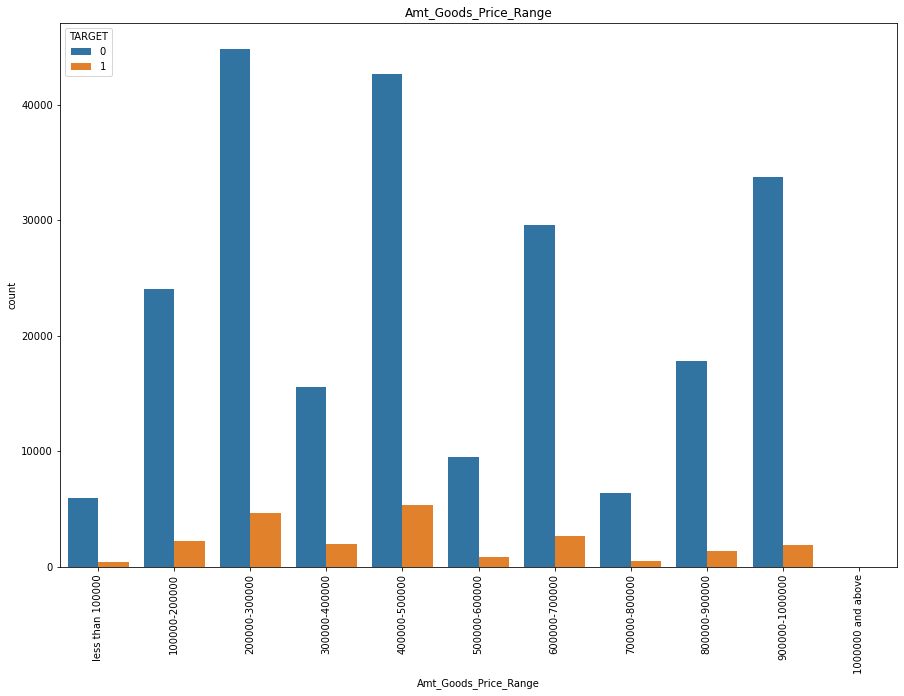

                       TARGET
Amt_Goods_Price_Range        
less than 100000         6.84
100000-200000            8.52
200000-300000            9.36
300000-400000           11.17
400000-500000           11.16
500000-600000            7.96
600000-700000            8.34
700000-800000            6.86
800000-900000            7.12
900000-1000000           5.18
1000000 and above         NaN


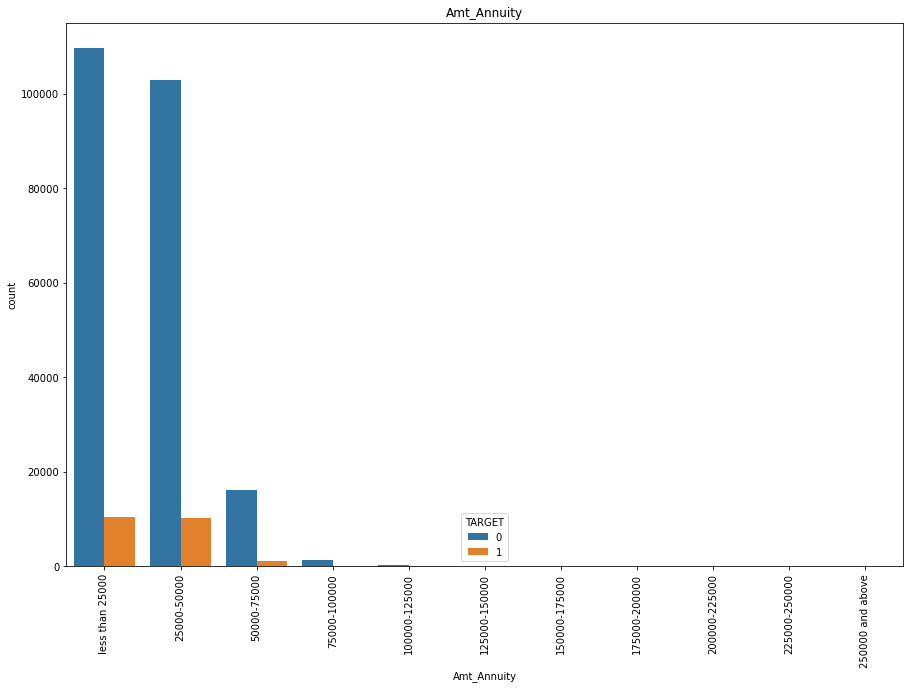

                  TARGET
Amt_Annuity             
less than 25000     8.66
25000-50000         9.08
50000-75000         6.37
75000-100000        3.96
100000-125000       2.38
125000-150000       1.33
150000-175000       0.00
175000-200000       0.00
200000-225000       0.00
225000-250000       0.00
250000 and above    0.00


In [33]:
for i in application_data:
    if i.startswith('Amt_'):
        plt.figure(figsize = (15,10))
        sns.countplot(data = application_data, x = i, hue = 'TARGET').set(title = i)
        plt.xticks(rotation=90)
        plt.show()
        print(round(application_data[[i,'TARGET']].groupby([i]).mean()*100,2))

### Observations

1.People with income 2-3 lacs are given most of the loans. As the income kept increasing from less than 1 lac to 10 lacs the default rate kept decreasing but people with income range 10000000 and above have avery high default rate.

2.Maximum of credit loans given are till a limit of 10 lacs and most of the loans are between credit range of 9-10 lacs. People who took a credit less than 3 lacs and greater than 6 lacs are less likely to default. 


3.Most of the loans are given to goods with price range 2-3 lacs & 4-5 lacs. People who purchased goods worth less than 3 lacs and greater than 5 lacs are less likely to default. 


4.Annuity paid by most of the customers upto 50K. As the annuity keeps on increasing the default rate is being decreased.

### Conclusion from Univariate Numerical Analysis

By Univariate numerical analysis we can conclude to approve loan for customers with incomes up to 10 lakhs, while caution is advised for those exceeding this threshold due to a higher default rate, potentially providing falsified income information. 

Additional vigilance is necessary for loans falling within the 3-6 lakh range, as this is common borrowing bracket and has a notable default rate, possibly getting loans by providing inaccurate data during borrowing.

### Bivariate Analysis 

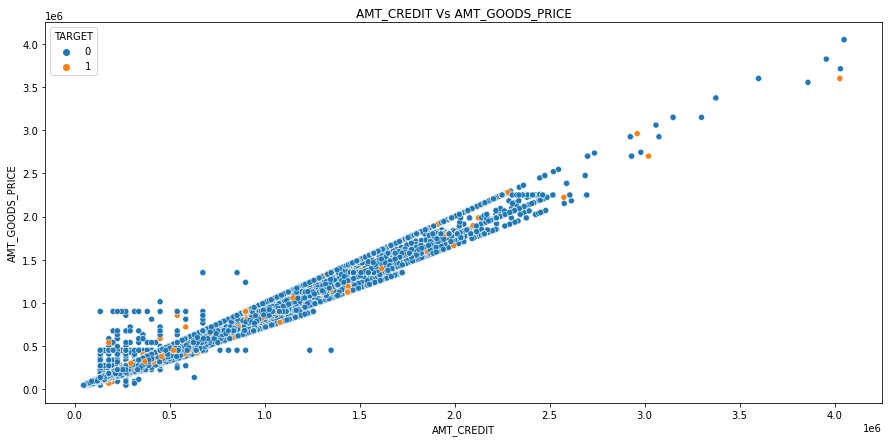

In [34]:
#Creating pairplot for numerical variables can give all relations but the view can not be clear
#So plotting individual relational graphs for varibles which add value to my analysis

#AMT_CREDIT Vs AMT_GOODS_PRICE

plt.figure(figsize = (15,7))
sns.scatterplot(data = application_data, x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', hue = 'TARGET')
plt.title('AMT_CREDIT Vs AMT_GOODS_PRICE')
plt.show()

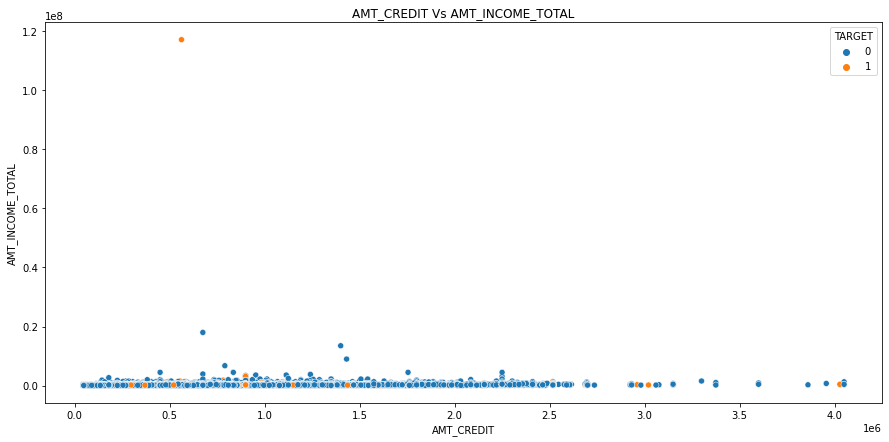

In [35]:
#AMT_CREDIT Vs AMT_INCOME_TOTAL

plt.figure(figsize = (15,7))
sns.scatterplot(data = application_data, x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', hue = 'TARGET')
plt.title('AMT_CREDIT Vs AMT_INCOME_TOTAL')
plt.show()

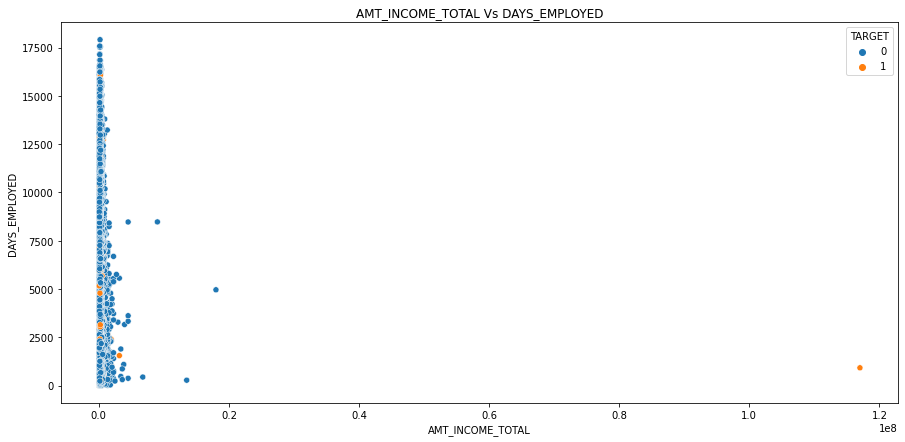

In [36]:
# AMT_INCOME_TOTAL Vs DAYS_EMPLOYED

plt.figure(figsize = (15,7))
sns.scatterplot(data = application_data, x = 'AMT_INCOME_TOTAL', y = 'DAYS_EMPLOYED', hue = 'TARGET')
plt.title('AMT_INCOME_TOTAL Vs DAYS_EMPLOYED')
plt.show()

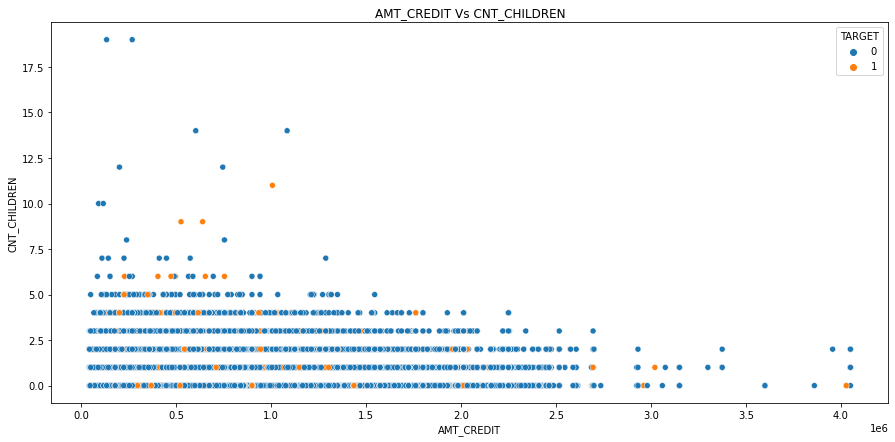

In [37]:
#AMT_CREDIT Vs CNT_CHILDREN

plt.figure(figsize = (15,7))
sns.scatterplot(data = application_data, x = 'AMT_CREDIT', y = 'CNT_CHILDREN', hue = 'TARGET')
plt.title('AMT_CREDIT Vs CNT_CHILDREN')
plt.show()

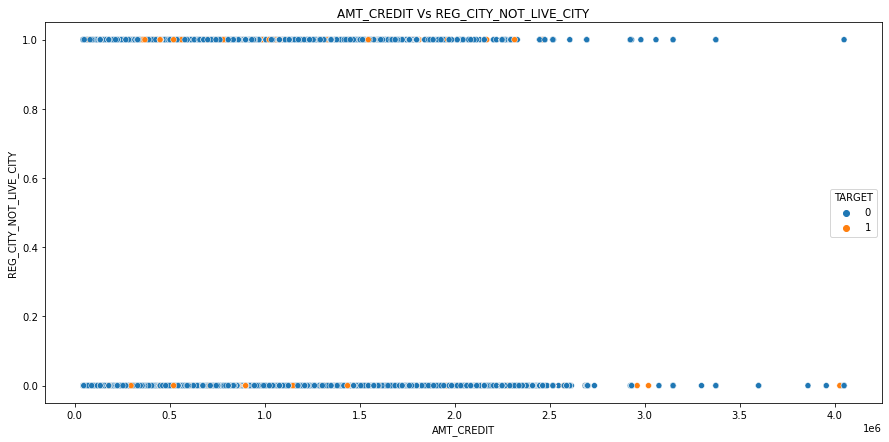

In [38]:
#AMT_CREDIT Vs REG_CITY_NOT_LIVE_CITY

plt.figure(figsize = (15,7))
sns.scatterplot(data = application_data, x = 'AMT_CREDIT', y = 'REG_CITY_NOT_LIVE_CITY', hue = 'TARGET')
plt.title('AMT_CREDIT Vs REG_CITY_NOT_LIVE_CITY')
plt.show()

### Observations

1.AMT_CREDIT and AMT_GOODS_PRICE are linearly corelated. The defaulters got decreased as the credit amount is increasing.

2.People with income less than 1 Million are taking most of the loans and as the income and credit amount gets increased and the defaulters are decreasing

3.Customers with extended employment duration are less likely to be defaulters.

4.People having no children are more likely to be defaulters.

5.Customers taking credit amount less than 5 lacs and whose contact address is not matching their permanent address are more likely to be defaulters.

### Conclusion from Bivariate Analysis

As per Bivariate Analysis banks can target customers who are having decent employment duration, healthy income and dependent children to offer loans and be cautious about the customers whose contact address is not matching their permanent address and seeking loan less than 5 lacs.

### Previous Application Data Cleaning

In [39]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Finding the null values

previous_app_null_percentage = round((previous_application.isnull().sum() / len(previous_application)) * 100,2)
previous_app_null_percentage = previous_app_null_percentage[previous_app_null_percentage>0]
previous_app_null_percentage

AMT_ANNUITY                  22.29
AMT_DOWN_PAYMENT             53.64
AMT_GOODS_PRICE              23.08
RATE_DOWN_PAYMENT            53.64
RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

In [41]:
#Higher Null percentage columns > 40%

prev_null_percentage_high = previous_app_null_percentage[previous_app_null_percentage >= 40]
prev_null_percentage_high.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [42]:
#Dropping the columns with high null Percentage

previous_application.drop(columns = prev_null_percentage_high.index.to_list(), inplace = True)

In [43]:
previous_application.shape

(1670214, 26)

In [44]:
#Checking other columns with null values

previous_application.isnull().sum().sort_values(ascending = False)

AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
CODE_REJECT_REASON                  0
NAME_YIELD_GROUP                    0
NAME_SELLER_INDUSTRY                0
SELLERPLACE_AREA                    0
CHANNEL_TYPE                        0
NAME_PRODUCT_TYPE                   0
NAME_PORTFOLIO                      0
NAME_GOODS_CATEGORY                 0
NAME_CLIENT_TYPE                    0
SK_ID_PREV                          0
NAME_PAYMENT_TYPE                   0
SK_ID_CURR                          0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
WEEKDAY_APPR_PROCESS_START          0
AMT_APPLICATION                     0
NAME_CONTRACT_TYPE                  0
DAYS_DECISION                       0
dtype: int64

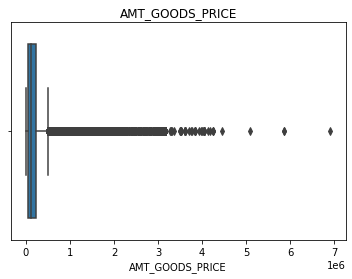

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [45]:
#plotting box plot for AMT_GOODS_PRICE to fix null values

sns.boxplot(previous_application['AMT_GOODS_PRICE']).set(title = 'AMT_GOODS_PRICE')
plt.show()
print(previous_application['AMT_GOODS_PRICE'].describe())

In [46]:
#There are extreme values do better to impute with median

previous_application['AMT_GOODS_PRICE'].fillna(1.123200e+05, inplace = True)

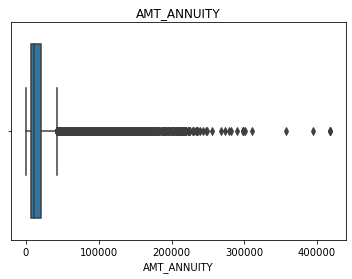

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


In [47]:
#plotting box plot for AMT_ANNUITY to fix null values

sns.boxplot(previous_application['AMT_ANNUITY']).set(title = 'AMT_ANNUITY')
plt.show()
print(previous_application['AMT_ANNUITY'].describe())

In [48]:
#There are extreme values do better to impute with median

previous_application['AMT_ANNUITY'].fillna(1.125000e+04, inplace = True)

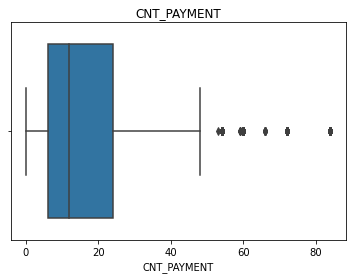

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


In [49]:
#plotting box plot for AMT_ANNUITY to fix null values

sns.boxplot(previous_application['CNT_PAYMENT']).set(title = 'CNT_PAYMENT')
plt.show()
print(previous_application['CNT_PAYMENT'].describe())

In [50]:
#There are extreme values do better to impute with median

previous_application['CNT_PAYMENT'].fillna(1.200000e+01, inplace = True)

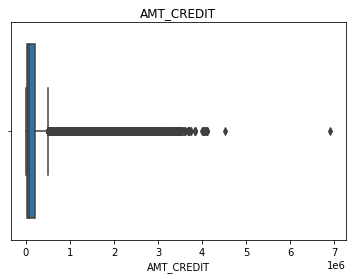

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


In [51]:
#plotting box plot for AMT_CREDIT to fix null values

sns.boxplot(previous_application['AMT_CREDIT']).set(title = 'AMT_CREDIT')
plt.show()
print(previous_application['AMT_CREDIT'].describe())

In [52]:
#There are extreme values do better to impute with median

previous_application['AMT_CREDIT'].fillna(8.054100e+04, inplace = True)

In [53]:
#PRODUCT_COMBINATION is categorical column
#Checking value counts to substitute the mode

previous_application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [54]:
#imputing cash might create biasing so replacing with a constant Unknown

previous_application['PRODUCT_COMBINATION'].fillna('Unknown', inplace = True)

In [55]:
#Checking if there are any other null values

previous_application.isin(['XNA','XAP']).any().sort_values(ascending = False)

NAME_PAYMENT_TYPE               True
NAME_CONTRACT_TYPE              True
NAME_YIELD_GROUP                True
NAME_SELLER_INDUSTRY            True
NAME_PRODUCT_TYPE               True
NAME_PORTFOLIO                  True
NAME_GOODS_CATEGORY             True
NAME_CASH_LOAN_PURPOSE          True
NAME_CLIENT_TYPE                True
CODE_REJECT_REASON              True
SK_ID_PREV                     False
CNT_PAYMENT                    False
SELLERPLACE_AREA               False
CHANNEL_TYPE                   False
DAYS_DECISION                  False
SK_ID_CURR                     False
NAME_CONTRACT_STATUS           False
NFLAG_LAST_APPL_IN_DAY         False
FLAG_LAST_APPL_PER_CONTRACT    False
HOUR_APPR_PROCESS_START        False
WEEKDAY_APPR_PROCESS_START     False
AMT_GOODS_PRICE                False
AMT_CREDIT                     False
AMT_APPLICATION                False
AMT_ANNUITY                    False
PRODUCT_COMBINATION            False
dtype: bool

In [56]:
#In all the above columns the XNA and XAP values are high
#This would reflect the graph views by showing XNA/XAP details as higher
#So better to drop NAME_CASH_LOAN_PURPOSE rows with XNA/XAP because it is a valuable variable in coming analysis

columns_to_check = ['NAME_CASH_LOAN_PURPOSE']
values_to_drop = ['XNA', 'XAP']

previous_application = previous_application.loc[~previous_application[columns_to_check].isin(values_to_drop).any(axis=1)]

### Data Merging

As the previous application data is ready to analyse merging both application data and previous application data

In [57]:
#Merging datasets, Suffixes Current = APplication data, Previous = Previous Data

merged_client_data = pd.merge(left= application_data, right= previous_application, how='inner', on=['SK_ID_CURR'], suffixes=('_Current', '_Previous'))

In [58]:
merged_client_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [59]:
#Checking the shape of merged dataset

merged_client_data.shape

(51420, 102)

### Data Analysis

In [60]:
#After meging the datasets the variables which add value to our analysis are:
# NAME_CASH_LOAN_PURPOSE because it shows what purpose customer has applied the loan
# NAME_CONTRACT_STATUS because it shows the status of previous application

### Univariate Analysis

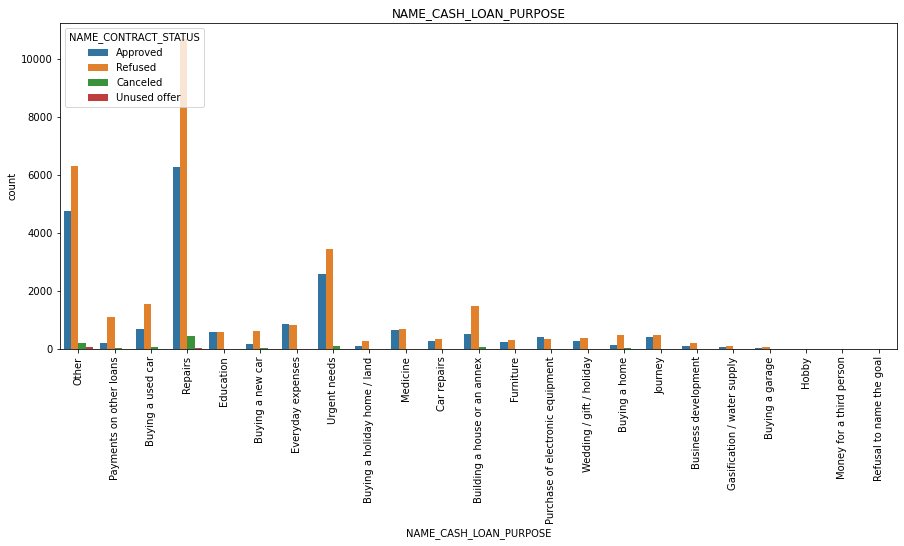

In [61]:
#Firstly we can analyse status of the type of loans applied and behavior

plt.figure(figsize = (15,6))
sns.countplot(data = merged_client_data, x = 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_CONTRACT_STATUS').set(title = 'NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation = 90)
plt.show()

#### Observation

Most of the customers applied for the purpose of Repairs and same type has most of the refusals and cancellations

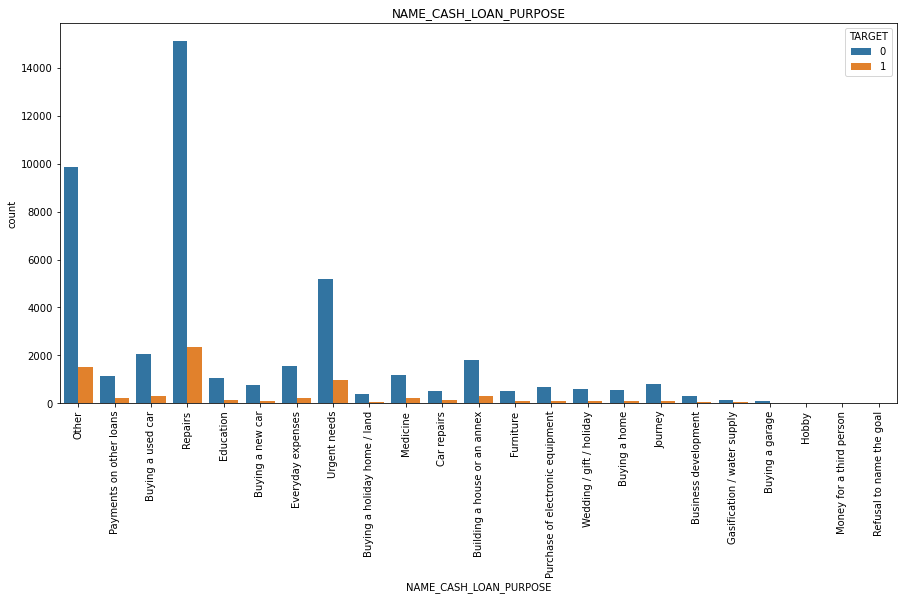

                                  TARGET
NAME_CASH_LOAN_PURPOSE                  
Building a house or an annex       14.35
Business development               13.61
Buying a garage                     5.36
Buying a holiday home / land       12.35
Buying a home                      12.17
Buying a new car                    9.32
Buying a used car                  13.12
Car repairs                        18.87
Education                          10.14
Everyday expenses                  11.52
Furniture                          13.92
Gasification / water supply        24.72
Hobby                              22.50
Journey                            11.24
Medicine                           15.05
Money for a third person           17.65
Other                              13.26
Payments on other loans            16.54
Purchase of electronic equipment   13.17
Refusal to name the goal           25.00
Repairs                            13.45
Urgent needs                       15.59
Wedding / gift /

In [62]:
#Analyse what type of loans have higher defaulters rate

plt.figure(figsize = (15,7))
sns.countplot(data = merged_client_data, x = 'NAME_CASH_LOAN_PURPOSE', hue = 'TARGET').set(title = 'NAME_CASH_LOAN_PURPOSE')
plt.xticks(rotation = 90)
plt.show()
print(round(merged_client_data[['NAME_CASH_LOAN_PURPOSE','TARGET']].groupby(['NAME_CASH_LOAN_PURPOSE']).mean()*100,2))

#### Observation

Customers applied for the purpose of Repairs have high number of defaulters but simultaneously repayers are also high for repairs.

'Refusal to name the goal' & 'Gasification / water supply' are the types with highest defaulters with a percentage of 25% but their volume is low.

Inorder to have clear picture based on volumes we need to calculate based on interest rates.

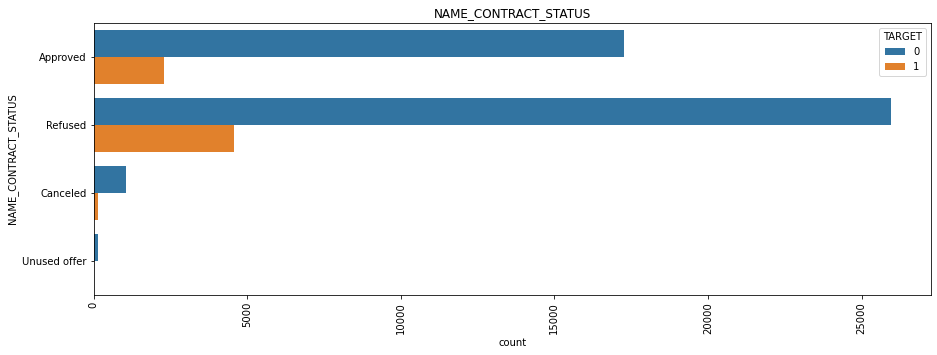

                      TARGET
NAME_CONTRACT_STATUS        
Approved               11.74
Canceled               11.34
Refused                14.93
Unused offer           11.25


In [63]:
#Analyse the defaulters based on their previous loan status

plt.figure(figsize = (15,5))
sns.countplot(data = merged_client_data, y = 'NAME_CONTRACT_STATUS', hue = 'TARGET').set(title = 'NAME_CONTRACT_STATUS')
plt.xticks(rotation = 90)
plt.show()
print(round(merged_client_data[['NAME_CONTRACT_STATUS','TARGET']].groupby(['NAME_CONTRACT_STATUS']).mean()*100,2))

#### Observations

Applicants whose loans were previously refused are more likely to be defaulters

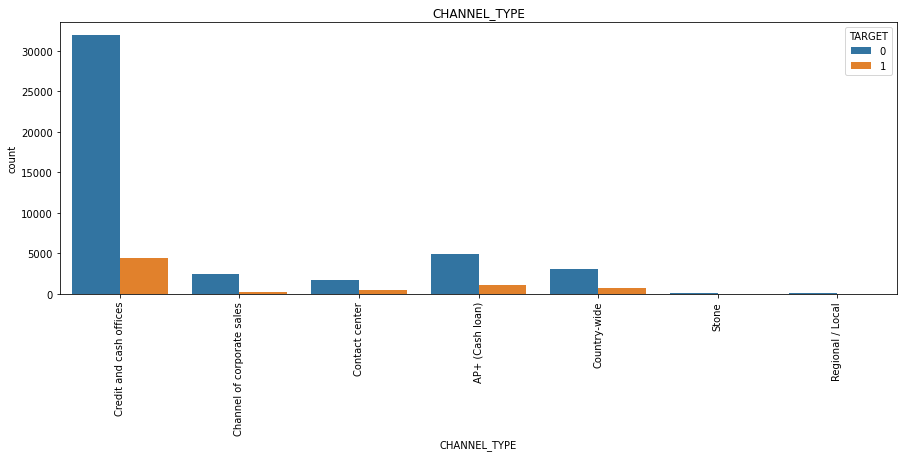

                            TARGET
CHANNEL_TYPE                      
AP+ (Cash loan)              18.47
Channel of corporate sales    6.99
Contact center               20.26
Country-wide                 18.92
Credit and cash offices      12.36
Regional / Local              9.89
Stone                        13.04


In [64]:
#Anlaysing the best channels of marketing to target good customers

plt.figure(figsize = (15,5))
sns.countplot(data = merged_client_data, x = 'CHANNEL_TYPE', hue = 'TARGET').set(title = 'CHANNEL_TYPE')
plt.xticks(rotation = 90)
plt.show()
print(round(merged_client_data[['CHANNEL_TYPE','TARGET']].groupby(['CHANNEL_TYPE']).mean()*100,2))

### Observation

The most effective channels for acquiring new customers with a lower rate of defaulters are corporate sales and regional/local channels.

### Bivariate Analysis

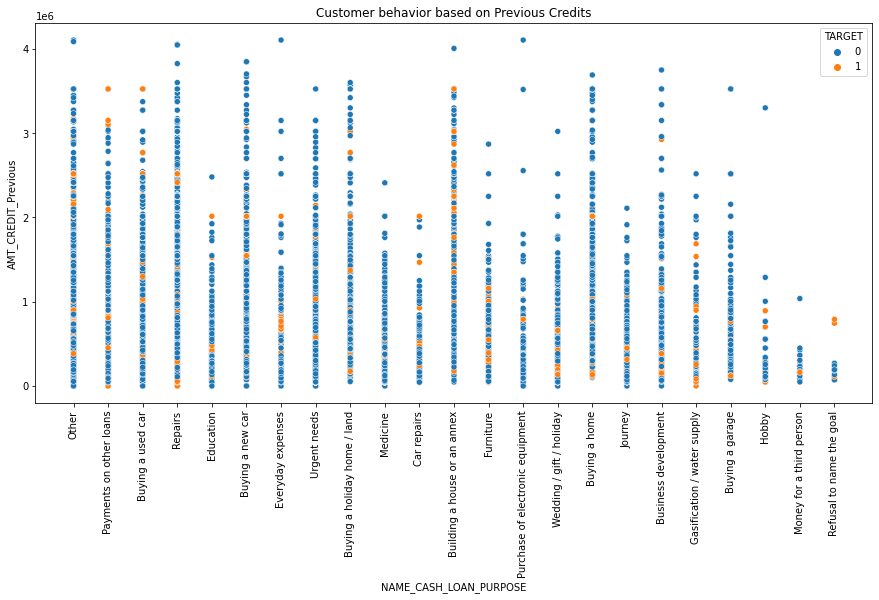

In [65]:
#NAME_CASH_LOAN_PURPOSE Vs AMT_CREDIT_Previous

plt.figure(figsize = (15,7))
sns.scatterplot(data = merged_client_data, x= 'NAME_CASH_LOAN_PURPOSE', y = 'AMT_CREDIT_Previous', hue = 'TARGET')
plt.title('Customer behavior based on Previous Credits')
plt.xticks(rotation = 90)
plt.show()

### Observation

Customers who have previously taken credit for medical purposes have a notably low default rate. Similarly, those who secured loans for purchasing new cars, homes, or garages are also less prone to default. So approving new loans for these segments appears to be a safe decision for the bank.

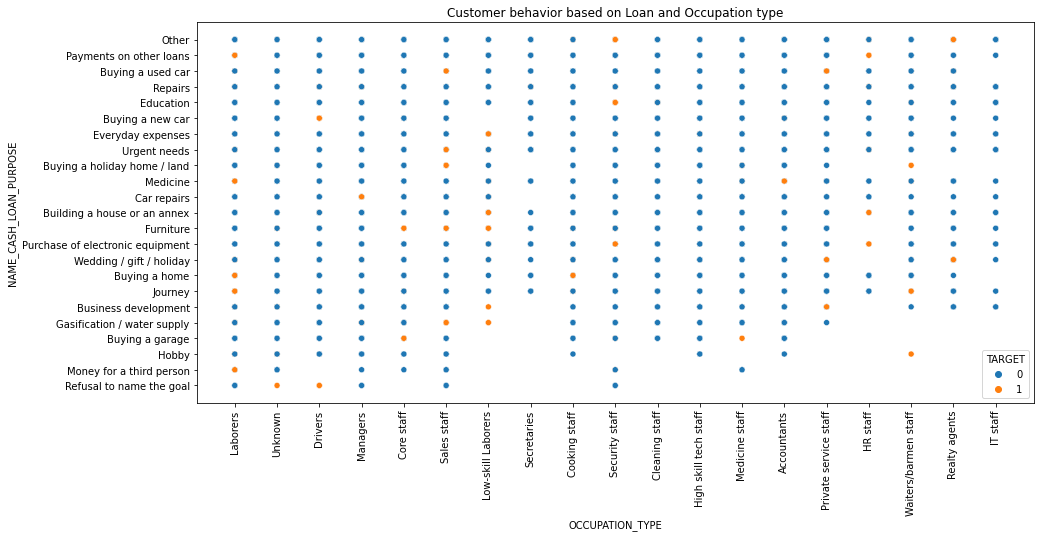

In [66]:
#NAME_CASH_LOAN_PURPOSE Vs AMT_CREDIT_Previous

plt.figure(figsize = (15,7))
sns.scatterplot(data = merged_client_data, x= 'OCCUPATION_TYPE', y = 'NAME_CASH_LOAN_PURPOSE', hue = 'TARGET')
plt.title('Customer behavior based on Loan and Occupation type')
plt.xticks(rotation = 90)
plt.show()

### Observation

1.High skill tech staff and IT staff who acquired loans for diverse needs have a flawless repayment record. Therefore, the bank can confidently extend loans to them.

2.Low-skilled laborers obtaining loans for home construction or business development are facing higher payment difficulties.

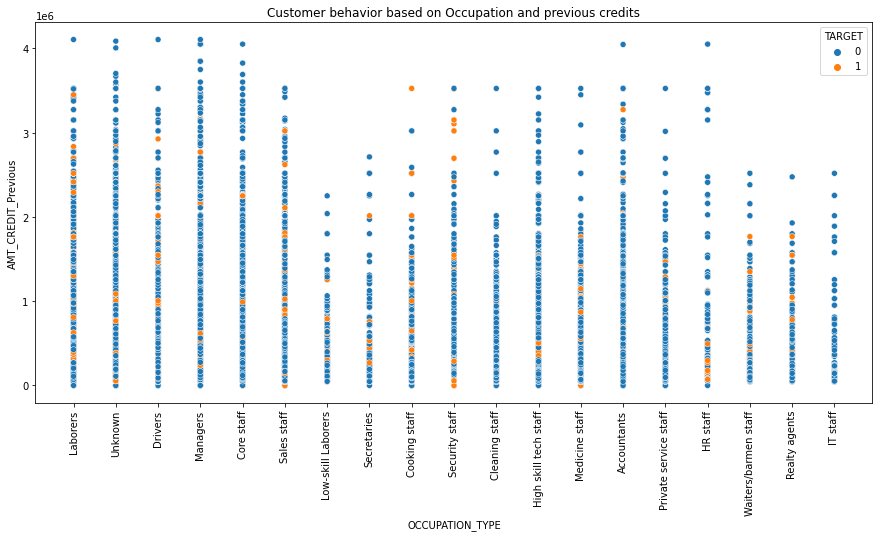

In [67]:
#OCCUPATION_TYPE Vs AMT_CREDIT_Previous

plt.figure(figsize = (15,7))
sns.scatterplot(data = merged_client_data, x= 'OCCUPATION_TYPE', y = 'AMT_CREDIT_Previous', hue = 'TARGET')
plt.title('Customer behavior based on Occupation and previous credits')
plt.xticks(rotation = 90)
plt.show()

### Observation

Laborers, low-skilled laborers, drivers, and security staff with larger credit amounts are more prone to default. A clear trend emerges: higher credit amounts for these occupations correlate with higher default rates.

### Multivariate Analysis

In [68]:
#Creating pivot table

res = pd.pivot_table(data = merged_client_data, index = 'OCCUPATION_TYPE', columns = ['Amt_Income_Range','CODE_GENDER'], values = 'TARGET')

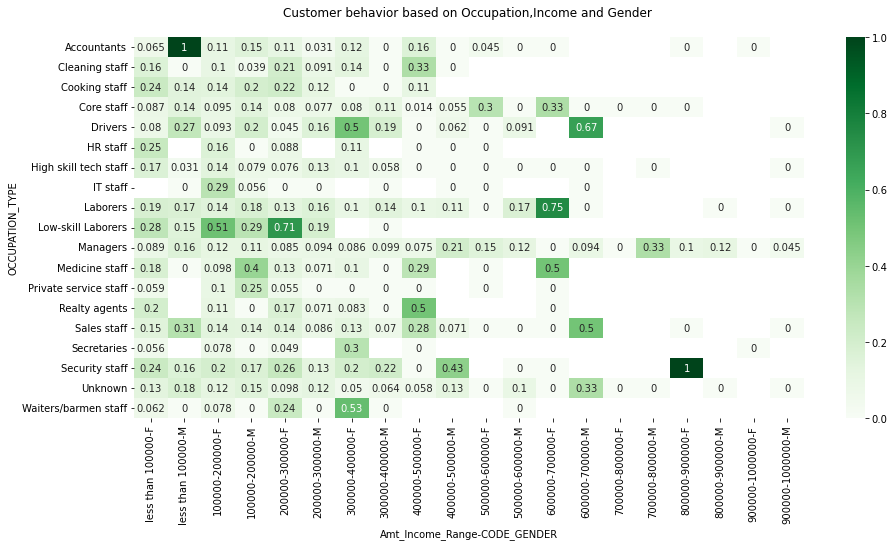

In [69]:
#Customer behavior based on Occupation,Income and Gender 

plt.figure(figsize = (15,7))
sns.heatmap(res,cmap='Greens',annot=True)
plt.title('Customer behavior based on Occupation,Income and Gender \n')
plt.show()

### Observation

Customers with higher income links to lower defaults. Certain jobs like drivers, laborers, and security staff are struggling with payments. 

In [70]:
res2 = pd.pivot_table(data = merged_client_data, index = 'OCCUPATION_TYPE', columns = ['FLAG_OWN_CAR', 'NAME_HOUSING_TYPE'], values = 'TARGET', aggfunc = 'mean')

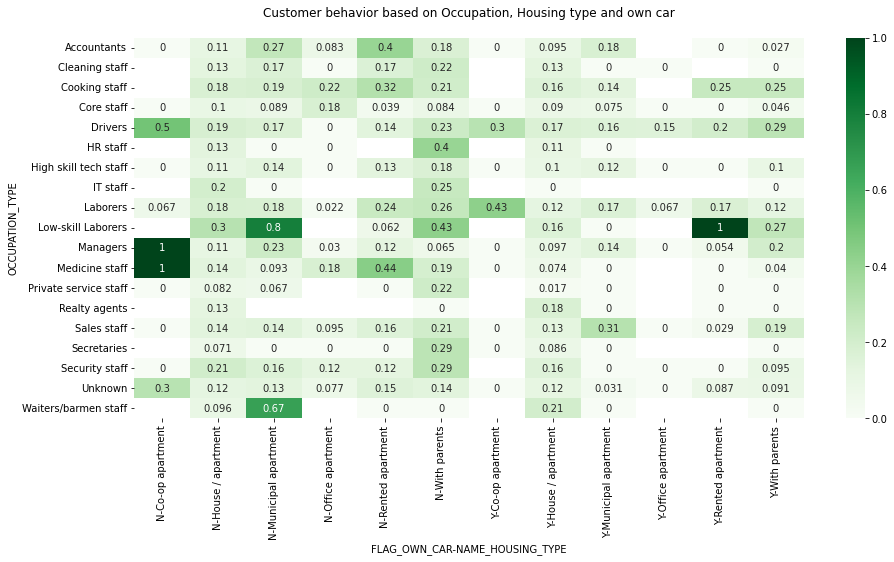

In [71]:
#Customer behavior based on Occupation, Housing type and own car 

plt.figure(figsize = (15,7))
sns.heatmap(res2,cmap='Greens',annot = True)
plt.title('Customer behavior based on Occupation, Housing type and own car\n')
plt.show()

### Observation

Observations highlight payment issues among various groups. Co-op apartment dwellers without cars (like drivers and medical staff) face problems. The same goes for low-skill laborers and barmen in municipal apartments without cars. Even low-skill laborers with cars in rented apartments encounter payment difficulties. These findings pinpoint about various demographics bank should be cautious about while approving loans.

In [72]:
res3 = pd.pivot_table(data = merged_client_data, index = 'OCCUPATION_TYPE', columns = ['Amt_Credit_Range', 'REG_REGION_NOT_LIVE_REGION'], values = 'TARGET', aggfunc = 'mean')

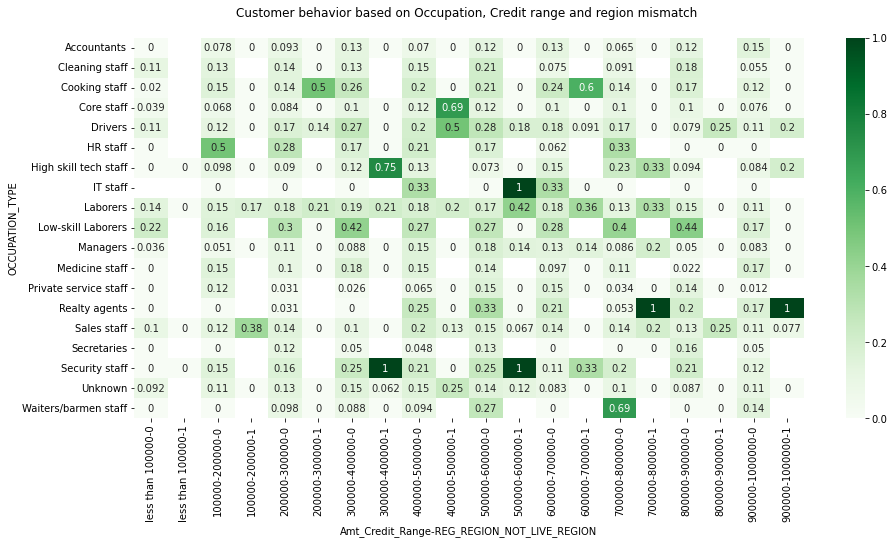

In [73]:
#Customer behavior based on Occupation, Credit range and region mismatch 

plt.figure(figsize = (15,7))
sns.heatmap(res3,cmap='Greens',annot = True)
plt.title('Customer behavior based on Occupation, Credit range and region mismatch \n')
plt.show()

### Observation 

Customers obtaining large credits, but with permanent addresses differing from contact addresses at the regional level, show an increased likelihood of default. This trend is particularly prominent among security staff and realty agents.

## Final Conclusion

1. Defaulters are fewer compared to non defaulters and the data imbalance ratio is 10.55

2. Few percentage of customers are having different contact and permanent addresses and they are turning out to be defaulters in cases of high credit

3. Customers with cash loans tend to have higher default rate compared to revolving loans

4. Customers with own cars are less likely to default may be because of financial stability

5. Married individuals default less than single or civil-married counterparts and parental statuses are also impacting   default rates

6. Customers having decent job tenurity having dood behavior those on maternity leave present higher default rates

7. Lower-educated individuals tend to default more, while higher-educated clients show better repayment behavior

8. Property owners have lower default rates

9. Certain occupations, like low-skilled laborers and drivers, are prone to higher default rates

10. Higher incomes correlate with lower defaults, but extreme high incomes again has higher default risk 

Considering the findings, banks should focus on customers with moderate/highly skilled occupations, stable income, and tenure. Married individuals owning properties and cars are preferred, while caution is advised with low-skilled and less educated customers. Attention is needed for accuracy in documents and matching contact regions.